**Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df=pd.read_excel("all_species_suryapet.xlsx")

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Mrigal_Small,float64
Mrigal_Medium,float64
Mrigal_Large,float64
Common_Carp_Large,float64
Common_Carp_Medium,float64
Common_Carp_Small,float64
Tilapia_Small,float64
Tilapia_Medium,float64
Tilapia_Large,float64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date',inplace=True)

In [ ]:
df.head(2)

,Mrigal_Small,Mrigal_Medium,Mrigal_Large,Common_Carp_Large,Common_Carp_Medium,Common_Carp_Small,Tilapia_Small,Tilapia_Medium,Tilapia_Large,Catla_Small,Catla_Medium,Catla_Large,Rohu_Small,Rohu_Medium,Rohu_Large
Date,,,,,,,,,,,,,,,
2024-01-01,112.0,132.0,185.0,182.0,132.0,112.0,70.0,100.0,132.0,100.0,132.0,185.0,NaN,NaN,NaN
2024-01-02,110.0,135.0,182.0,175.0,135.0,112.0,70.0,100.0,121.0,112.0,135.0,185.0,100.0,135.0,182.0


In [ ]:

df.fillna(method='ffill', inplace=True)

<ipython-input-72-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df['Rohu_Large'].replace(np.nan,df['Rohu_Large'].iloc[1],inplace=True)
df['Rohu_Medium'].replace(np.nan,df['Rohu_Medium'].iloc[1],inplace=True)
df['Rohu_Small'].replace(np.nan,df['Rohu_Small'].iloc[1],inplace=True)

<ipython-input-73-75beb1904e6e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rohu_Large'].replace(np.nan,df['Rohu_Large'].iloc[1],inplace=True)
<ipython-input-73-75beb1904e6e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
df.columns

Index(['Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large', 'Common_Carp_Large',
       'Common_Carp_Medium', 'Common_Carp_Small', 'Tilapia_Small',
       'Tilapia_Medium', 'Tilapia_Large', 'Catla_Small', 'Catla_Medium',
       'Catla_Large', 'Rohu_Small', 'Rohu_Medium', 'Rohu_Large'],
      dtype='object')

In [ ]:
df.describe()

,Mrigal_Small,Mrigal_Medium,Mrigal_Large,Common_Carp_Large,Common_Carp_Medium,Common_Carp_Small,Tilapia_Small,Tilapia_Medium,Tilapia_Large,Catla_Small,Catla_Medium,Catla_Large,Rohu_Small,Rohu_Medium,Rohu_Large
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,112.046296,136.115741,173.032407,172.824074,136.888889,112.215278,70.423611,103.275463,125.351852,113.245370,138.976852,179.787037,113.703704,139.775463,183.553241
std,3.079411,10.393222,12.304107,12.302135,10.458699,3.024639,3.779134,6.798086,8.617486,4.295357,13.045500,8.824193,5.906478,13.565962,35.551171
min,95.000000,112.000000,119.000000,132.000000,120.000000,96.000000,65.000000,75.000000,92.000000,100.000000,113.000000,145.000000,99.000000,121.000000,138.000000
25%,112.000000,132.000000,175.000000,175.000000,132.000000,112.000000,70.000000,100.000000,121.000000,112.000000,132.000000,175.000000,112.000000,132.000000,175.000000
50%,112.000000,135.000000,175.000000,175.000000,135.000000,112.000000,70.000000,100.000000,121.000000,112.000000,135.000000,182.000000,112.000000,135.000000,182.000000
75%,112.000000,135.000000,182.000000,182.000000,135.000000,112.000000,70.000000,111.000000,132.000000,112.000000,136.000000,185.000000,112.000000,138.000000,185.000000
max,132.000000,182.000000,195.000000,195.000000,175.000000,132.000000,112.000000,138.000000,185.000000,142.000000,185.000000,198.000000,152.000000,186.000000,600.000000


In [ ]:
df['Rohu_Large_Sqrt'] = np.sqrt(df['Rohu_Large'])
df['Rohu_Medium_Sqrt'] = np.sqrt(df['Rohu_Medium'])
df['Rohu_Small_Sqrt'] = np.sqrt(df['Rohu_Small'])
df['Catla_Large_Sqrt'] = np.sqrt(df['Catla_Large'])
df['Catla_Medium_Sqrt'] = np.sqrt(df['Catla_Medium'])
df['Catla_Small_Sqrt'] = np.sqrt(df['Catla_Small'])
df['Tilapia_Large_Sqrt'] = np.sqrt(df['Tilapia_Large'])
df['Tilapia_Medium_Sqrt'] = np.sqrt(df['Tilapia_Medium'])
df['Tilapia_Small_Sqrt'] = np.sqrt(df['Tilapia_Small'])
df['Common_Carp_Large_Sqrt'] = np.sqrt(df['Common_Carp_Large'])
df['Common_Carp_Medium_Sqrt'] = np.sqrt(df['Common_Carp_Medium'])
df['Common_Carp_Small_Sqrt'] = np.sqrt(df['Common_Carp_Small'])
df['Mrigal_Large_Sqrt'] = np.sqrt(df['Mrigal_Large'])
df['Mrigal_Medium_Sqrt'] = np.sqrt(df['Mrigal_Medium'])
df['Mrigal_Small_Sqrt'] = np.sqrt(df['Mrigal_Small'])


**Determining stationarity of Data**

In [ ]:
def stationary_test(dataframe,column):
  print("For the column {}".format(column))
  adftest=adfuller(dataframe[column],autolag='AIC')
  stats=pd.Series(adftest[1],index=['p-value'])
  print(stats)
  dataframe.dropna(inplace=True)

In [ ]:
stationary_test(df,'Rohu_Large_Sqrt')
stationary_test(df,'Rohu_Medium_Sqrt')
stationary_test(df,'Rohu_Small_Sqrt')
stationary_test(df,'Catla_Large_Sqrt')
stationary_test(df,'Catla_Medium_Sqrt')
stationary_test(df,'Catla_Small_Sqrt')
stationary_test(df,'Tilapia_Large_Sqrt')
stationary_test(df,'Tilapia_Medium_Sqrt')
stationary_test(df,'Tilapia_Small_Sqrt')
stationary_test(df,'Common_Carp_Large_Sqrt')
stationary_test(df,'Common_Carp_Medium_Sqrt')
stationary_test(df,'Common_Carp_Small_Sqrt')
stationary_test(df,'Mrigal_Large_Sqrt')
stationary_test(df,'Mrigal_Medium_Sqrt')
stationary_test(df,'Mrigal_Small_Sqrt')

For the column Rohu_Large_Sqrt
p-value    1.806296e-08
dtype: float64
For the column Rohu_Medium_Sqrt
p-value    1.952329e-28
dtype: float64
For the column Rohu_Small_Sqrt
p-value    9.122614e-27
dtype: float64
For the column Catla_Large_Sqrt
p-value    2.928925e-20
dtype: float64
For the column Catla_Medium_Sqrt
p-value    1.485734e-20
dtype: float64
For the column Catla_Small_Sqrt
p-value    0.000878
dtype: float64
For the column Tilapia_Large_Sqrt
p-value    1.927730e-16
dtype: float64
For the column Tilapia_Medium_Sqrt
p-value    0.029093
dtype: float64
For the column Tilapia_Small_Sqrt
p-value    1.126789e-25
dtype: float64
For the column Common_Carp_Large_Sqrt
p-value    0.043968
dtype: float64
For the column Common_Carp_Medium_Sqrt
p-value    3.991095e-28
dtype: float64
For the column Common_Carp_Small_Sqrt
p-value    9.919651e-29
dtype: float64
For the column Mrigal_Large_Sqrt
p-value    9.500455e-10
dtype: float64
For the column Mrigal_Medium_Sqrt
p-value    4.037610e-19
dtype

In [ ]:
df.shape

(432, 30)

In [ ]:
df.columns

Index(['Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large', 'Common_Carp_Large',
       'Common_Carp_Medium', 'Common_Carp_Small', 'Tilapia_Small',
       'Tilapia_Medium', 'Tilapia_Large', 'Catla_Small', 'Catla_Medium',
       'Catla_Large', 'Rohu_Small', 'Rohu_Medium', 'Rohu_Large',
       'Rohu_Large_Sqrt', 'Rohu_Medium_Sqrt', 'Rohu_Small_Sqrt',
       'Catla_Large_Sqrt', 'Catla_Medium_Sqrt', 'Catla_Small_Sqrt',
       'Tilapia_Large_Sqrt', 'Tilapia_Medium_Sqrt', 'Tilapia_Small_Sqrt',
       'Common_Carp_Large_Sqrt', 'Common_Carp_Medium_Sqrt',
       'Common_Carp_Small_Sqrt', 'Mrigal_Large_Sqrt', 'Mrigal_Medium_Sqrt',
       'Mrigal_Small_Sqrt'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

def plot_series(historical_data, forecast_data):
    columns = ['Rohu_Large', 'Rohu_Medium', 'Rohu_Small', 'Catla_Medium',
               'Catla_Large', 'Catla_Small', 'Tilapia_Small', 'Tilapia_Medium',
               'Tilapia_Large', 'Common_Carp_Small', 'Common_Carp_Medium',
               'Common_Carp_Large', 'Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large']

    plt.figure(figsize=(12, 10))

    for i, col in enumerate(columns, 1):
        plt.subplot(5, 3, i)
        plt.plot(historical_data.index, historical_data[col], label='Historical', color='blue')
        plt.plot(forecast_data.index, forecast_data[col], label='Forecast', linestyle='--', color='red')
        plt.title(col.replace('_', ' '))
        plt.xticks(rotation=45)
        plt.ylim(0,650)
        plt.legend()


    plt.tight_layout()
    plt.show()


**Dividing Data into Training and Testing**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Total RMSE 21.8499147725547
Rohu Large RMSE 78.17358865482426
Rohu Medium RMSE 11.3209662572424
Rohu Small RMSE 3.122348060543015
Catla Medium 13.97591162118741
Catla Large RMSE 6.025030565397593
Catla Small RMSE 2.8171015677062816
Tilapia Small RMSE 1.0373738928771536
Tilapia Medium RMSE 9.829777355932578
Tilapia Large RMSE 5.682828761267341
Common Carp Small RMSE 1.35910110257507
Common Carp Medium RMSE 10.144581558858373
Common Carp Large RMSE 11.256028045941669
Mrigal Small RMSE 2.387580227611741
Mrigal Medium RMSE 11.716830812492972
Mrigal Large RMSE 12.971408702648457


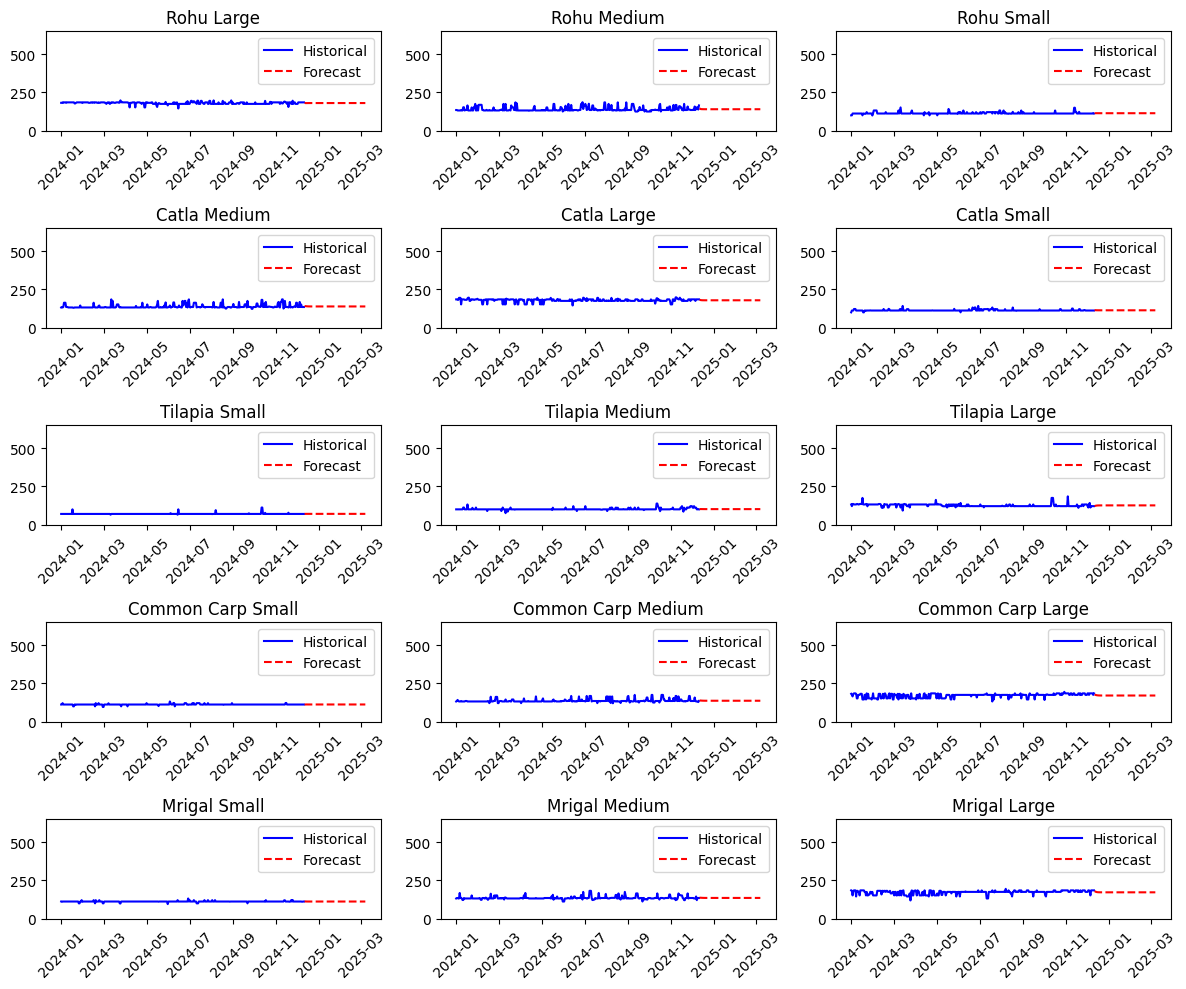

In [ ]:
train=df[['Rohu_Large', 'Rohu_Medium', 'Rohu_Small', 'Catla_Medium',
       'Catla_Large', 'Catla_Small', 'Tilapia_Small', 'Tilapia_Medium',
       'Tilapia_Large', 'Common_Carp_Small', 'Common_Carp_Medium',
       'Common_Carp_Large', 'Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large']].iloc[0:345]
test=df[['Rohu_Large', 'Rohu_Medium', 'Rohu_Small', 'Catla_Medium',
       'Catla_Large', 'Catla_Small', 'Tilapia_Small', 'Tilapia_Medium',
       'Tilapia_Large', 'Common_Carp_Small', 'Common_Carp_Medium',
       'Common_Carp_Large', 'Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large']].iloc[345:]
train=np.sqrt(train)
test=np.sqrt(test)
scaler=StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
train=np.power(train,2)
test=np.power(test,2)
forecast_data=np.power(forecast_data,2)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Rohu Large RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Large'],forecast_data['Rohu_Large']))))
print("Rohu Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Medium'],forecast_data['Rohu_Medium']))))
print("Rohu Small RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Small'],forecast_data['Rohu_Small']))))
print("Catla Medium {}".format(np.sqrt(mean_squared_error(test['Catla_Medium'],forecast_data['Catla_Medium']))))
print("Catla Large RMSE {}".format(np.sqrt(mean_squared_error(test['Catla_Large'],forecast_data['Catla_Large']))))
print("Catla Small RMSE {}".format(np.sqrt(mean_squared_error(test['Catla_Small'],forecast_data['Catla_Small']))))
print("Tilapia Small RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Small'],forecast_data['Tilapia_Small']))))
print("Tilapia Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Medium'],forecast_data['Tilapia_Medium']))))
print("Tilapia Large RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Large'],forecast_data['Tilapia_Large']))))
print("Common Carp Small RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Small'],forecast_data['Common_Carp_Small']))))
print("Common Carp Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Medium'],forecast_data['Common_Carp_Medium']))))
print("Common Carp Large RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Large'],forecast_data['Common_Carp_Large']))))
print("Mrigal Small RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Small'],forecast_data['Mrigal_Small']))))
print("Mrigal Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Medium'],forecast_data['Mrigal_Medium']))))
print("Mrigal Large RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Large'],forecast_data['Mrigal_Large']))))
plot_series(train,forecast_data)

**Using the Entire Data for Training and Testing**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Total RMSE 12.697494327133525
Rohu Large RMSE 35.520790203678374
Rohu Medium RMSE 13.553193573641487
Rohu Small RMSE 5.881978906831104
Catla Medium 13.03398003853359
Catla Large RMSE 8.798562242042125
Catla Small RMSE 4.282317443600504
Tilapia Small RMSE 3.7757090055265876
Tilapia Medium RMSE 6.830648236961207
Tilapia Large RMSE 8.643670817887203
Common Carp Small RMSE 3.0224900101936347
Common Carp Medium RMSE 10.449255969724238
Common Carp Large RMSE 12.277444637205798
Mrigal Small RMSE 3.078935418838523
Mrigal Medium RMSE 10.383264536725283
Mrigal Large RMSE 12.278751588033426


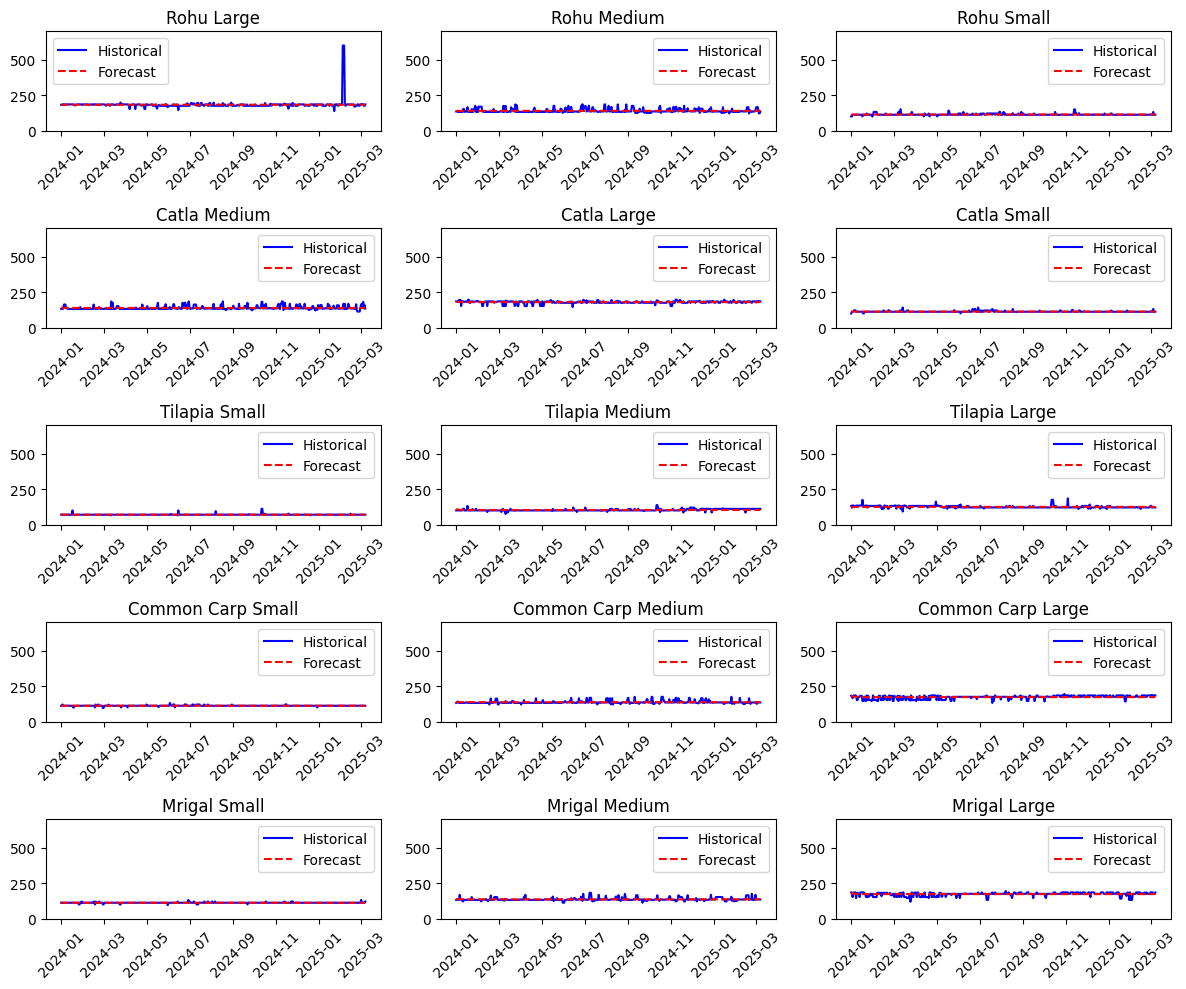

In [ ]:
train=df[['Rohu_Large', 'Rohu_Medium', 'Rohu_Small', 'Catla_Medium',
       'Catla_Large', 'Catla_Small', 'Tilapia_Small', 'Tilapia_Medium',
       'Tilapia_Large', 'Common_Carp_Small', 'Common_Carp_Medium',
       'Common_Carp_Large', 'Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large']]
test=df[['Rohu_Large', 'Rohu_Medium', 'Rohu_Small', 'Catla_Medium',
       'Catla_Large', 'Catla_Small', 'Tilapia_Small', 'Tilapia_Medium',
       'Tilapia_Large', 'Common_Carp_Small', 'Common_Carp_Medium',
       'Common_Carp_Large', 'Mrigal_Small', 'Mrigal_Medium', 'Mrigal_Large']]
train=np.sqrt(train)
test=np.sqrt(test)
scaler=StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
train=np.power(train,2)
test=np.power(test,2)
forecast_data=np.power(forecast_data,2)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Rohu Large RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Large'],forecast_data['Rohu_Large']))))
print("Rohu Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Medium'],forecast_data['Rohu_Medium']))))
print("Rohu Small RMSE {}".format(np.sqrt(mean_squared_error(test['Rohu_Small'],forecast_data['Rohu_Small']))))
print("Catla Medium {}".format(np.sqrt(mean_squared_error(test['Catla_Medium'],forecast_data['Catla_Medium']))))
print("Catla Large RMSE {}".format(np.sqrt(mean_squared_error(test['Catla_Large'],forecast_data['Catla_Large']))))
print("Catla Small RMSE {}".format(np.sqrt(mean_squared_error(test['Catla_Small'],forecast_data['Catla_Small']))))
print("Tilapia Small RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Small'],forecast_data['Tilapia_Small']))))
print("Tilapia Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Medium'],forecast_data['Tilapia_Medium']))))
print("Tilapia Large RMSE {}".format(np.sqrt(mean_squared_error(test['Tilapia_Large'],forecast_data['Tilapia_Large']))))
print("Common Carp Small RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Small'],forecast_data['Common_Carp_Small']))))
print("Common Carp Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Medium'],forecast_data['Common_Carp_Medium']))))
print("Common Carp Large RMSE {}".format(np.sqrt(mean_squared_error(test['Common_Carp_Large'],forecast_data['Common_Carp_Large']))))
print("Mrigal Small RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Small'],forecast_data['Mrigal_Small']))))
print("Mrigal Medium RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Medium'],forecast_data['Mrigal_Medium']))))
print("Mrigal Large RMSE {}".format(np.sqrt(mean_squared_error(test['Mrigal_Large'],forecast_data['Mrigal_Large']))))

plot_series(train,forecast_data)
with open('model.pkl','wb') as file:
  pickle.dump(results,file)

Function to be used for Deployment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime


In [ ]:
def predict(fore_date,fish,size):
  train_data=pd.read_excel("all_species_suryapet.xlsx")
  train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d-%m-%Y')
  train_data.set_index('Date',inplace=True)
  train_data.replace(0, np.nan, inplace=True)
  train_data.fillna(method='ffill', inplace=True)
  scaler=StandardScaler()
  train_scaled = pd.DataFrame(scaler.fit_transform(np.sqrt(train_data)),
                                columns=train_data.columns,
                                index=train_data.index)
  baseline_date=datetime.strptime("8-03-2025", "%d-%m-%Y")
  with open('model.pkl','rb') as file:
    model=pickle.load(file)
  if(fore_date<baseline_date):
    return "enter dates after 7th March,2025 only"
  steps=(fore_date-baseline_date).days
  lag_order = model.k_ar
  forecast_scaled = model.forecast(train_scaled.values[-lag_order:], steps=steps)
  forecast = scaler.inverse_transform(forecast_scaled)
  forecast_data = pd.DataFrame(forecast, columns=train_data.columns)
  forecast_data = np.power(forecast_data, 2)
  fish_and_size=""
  if(fish=="Rohu" and size=="Large"):
    fish_and_size="Rohu_Large"
  elif(fish=="Rohu" and size=="Medium"):
    fish_and_size="Rohu_Medium"
  elif(fish=="Rohu" and size=="Small"):
    fish_and_size="Rohu_Small"
  elif(fish=="Catla" and size=="Large"):
    fish_and_size="Catla_Large"
  elif(fish=="Catla" and size=="Medium"):
    fish_and_size="Catla_Medium"
  elif(fish=="Catla" and size=="Small"):
    fish_and_size="Catla_Small"
  elif(fish=="Tilapia" and size=="Large"):
    fish_and_size="Tilapia_Large"
  elif(fish=="Tilapia" and size=="Medium"):
    fish_and_size="Tilapia_Medium"
  elif(fish=="Tilapia" and size=="Small"):
    fish_and_size="Tilapia_Small"
  elif(fish=="Common Carp" and size=="Large"):
    fish_and_size="Common_Carp_Large"
  elif(fish=="Common Carp" and size=="Medium"):
    fish_and_size="Common_Carp_Medium"
  elif(fish=="Common Carp" and size=="Small"):
    fish_and_size="Common_Carp_Small"
  elif(fish=="Mrigal" and size=="Large"):
    fish_and_size="Mrigal_Large"
  elif(fish=="Mrigal" and size=="Medium"):
    fish_and_size="Mrigal_Medium"
  elif(fish=="Mrigal" and size=="Small"):
    fish_and_size="Mrigal_Small"
  else:
    return "Incorrect Input"
  fish_data=forecast_data[fish_and_size]
  forecast_dates=[]
  final_forecast_data={
      'Date':[],
      'Prediction':[]
  }
  from datetime import timedelta
  for i in range(len(fish_data)):
    current_date = baseline_date + timedelta(days=i+1)
    print("Date {} Prediction {} Rupees".format(current_date,np.round(fish_data[i])))
    forecast_dates.append(baseline_date + timedelta(days=i+1))
    final_forecast_data['Date'].append(current_date)
    final_forecast_data['Prediction'].append(np.round(fish_data[i]))
  plt.plot(train_data.index,train_data[fish_and_size],label="Historical Data",color="blue")
  plt.plot(forecast_dates,fish_data,label="Forecast Data",linestyle="--",color="red")
  plt.xticks(rotation=45)
  plt.ylim(0,250)
  plt.legend()
  plt.show()





<ipython-input-99-6f3aa27428d0>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


Date 2025-03-09 00:00:00 Prediction 118.0 Rupees
Date 2025-03-10 00:00:00 Prediction 116.0 Rupees
Date 2025-03-11 00:00:00 Prediction 115.0 Rupees
Date 2025-03-12 00:00:00 Prediction 114.0 Rupees
Date 2025-03-13 00:00:00 Prediction 113.0 Rupees
Date 2025-03-14 00:00:00 Prediction 113.0 Rupees
Date 2025-03-15 00:00:00 Prediction 113.0 Rupees
Date 2025-03-16 00:00:00 Prediction 112.0 Rupees
Date 2025-03-17 00:00:00 Prediction 112.0 Rupees
Date 2025-03-18 00:00:00 Prediction 112.0 Rupees
Date 2025-03-19 00:00:00 Prediction 112.0 Rupees
Date 2025-03-20 00:00:00 Prediction 112.0 Rupees
Date 2025-03-21 00:00:00 Prediction 112.0 Rupees
Date 2025-03-22 00:00:00 Prediction 112.0 Rupees
Date 2025-03-23 00:00:00 Prediction 112.0 Rupees
Date 2025-03-24 00:00:00 Prediction 112.0 Rupees
Date 2025-03-25 00:00:00 Prediction 112.0 Rupees
Date 2025-03-26 00:00:00 Prediction 112.0 Rupees
Date 2025-03-27 00:00:00 Prediction 112.0 Rupees
Date 2025-03-28 00:00:00 Prediction 112.0 Rupees
Date 2025-03-29 00:0

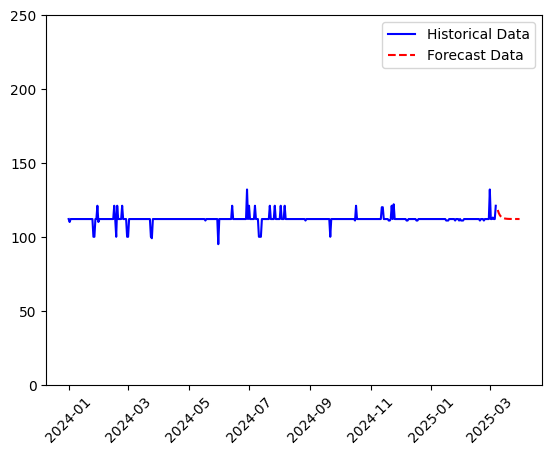

In [ ]:
predict(datetime.strptime("31-03-2025", "%d-%m-%Y"),"Mrigal","Small")

<ipython-input-99-6f3aa27428d0>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


Date 2025-03-09 00:00:00 Prediction 182.0 Rupees
Date 2025-03-10 00:00:00 Prediction 182.0 Rupees
Date 2025-03-11 00:00:00 Prediction 182.0 Rupees
Date 2025-03-12 00:00:00 Prediction 182.0 Rupees
Date 2025-03-13 00:00:00 Prediction 181.0 Rupees
Date 2025-03-14 00:00:00 Prediction 181.0 Rupees
Date 2025-03-15 00:00:00 Prediction 181.0 Rupees
Date 2025-03-16 00:00:00 Prediction 181.0 Rupees
Date 2025-03-17 00:00:00 Prediction 180.0 Rupees
Date 2025-03-18 00:00:00 Prediction 180.0 Rupees
Date 2025-03-19 00:00:00 Prediction 180.0 Rupees
Date 2025-03-20 00:00:00 Prediction 180.0 Rupees
Date 2025-03-21 00:00:00 Prediction 180.0 Rupees
Date 2025-03-22 00:00:00 Prediction 180.0 Rupees
Date 2025-03-23 00:00:00 Prediction 180.0 Rupees
Date 2025-03-24 00:00:00 Prediction 180.0 Rupees
Date 2025-03-25 00:00:00 Prediction 180.0 Rupees
Date 2025-03-26 00:00:00 Prediction 180.0 Rupees
Date 2025-03-27 00:00:00 Prediction 180.0 Rupees
Date 2025-03-28 00:00:00 Prediction 180.0 Rupees
Date 2025-03-29 00:0

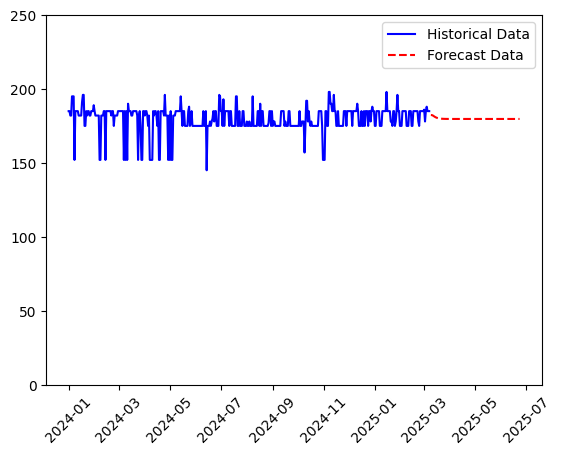

In [ ]:
predict(datetime.strptime("23-06-2025", "%d-%m-%Y"),"Catla","Large")

<ipython-input-99-6f3aa27428d0>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


Date 2025-03-09 00:00:00 Prediction 109.0 Rupees
Date 2025-03-10 00:00:00 Prediction 108.0 Rupees
Date 2025-03-11 00:00:00 Prediction 107.0 Rupees
Date 2025-03-12 00:00:00 Prediction 106.0 Rupees
Date 2025-03-13 00:00:00 Prediction 105.0 Rupees
Date 2025-03-14 00:00:00 Prediction 105.0 Rupees
Date 2025-03-15 00:00:00 Prediction 104.0 Rupees
Date 2025-03-16 00:00:00 Prediction 104.0 Rupees
Date 2025-03-17 00:00:00 Prediction 104.0 Rupees
Date 2025-03-18 00:00:00 Prediction 104.0 Rupees
Date 2025-03-19 00:00:00 Prediction 104.0 Rupees
Date 2025-03-20 00:00:00 Prediction 103.0 Rupees
Date 2025-03-21 00:00:00 Prediction 103.0 Rupees
Date 2025-03-22 00:00:00 Prediction 103.0 Rupees
Date 2025-03-23 00:00:00 Prediction 103.0 Rupees
Date 2025-03-24 00:00:00 Prediction 103.0 Rupees
Date 2025-03-25 00:00:00 Prediction 103.0 Rupees
Date 2025-03-26 00:00:00 Prediction 103.0 Rupees
Date 2025-03-27 00:00:00 Prediction 103.0 Rupees
Date 2025-03-28 00:00:00 Prediction 103.0 Rupees
Date 2025-03-29 00:0

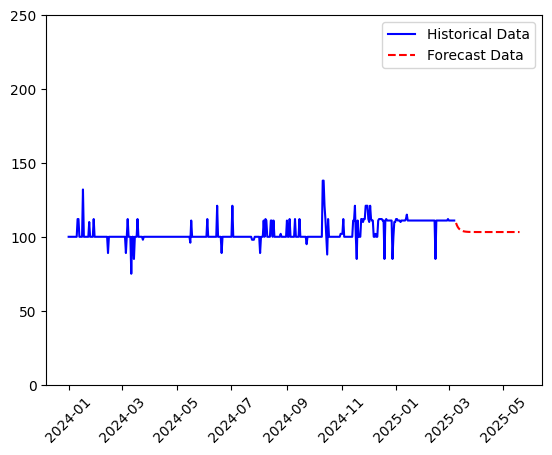

In [ ]:
predict(datetime.strptime("19-05-2025", "%d-%m-%Y"),"Tilapia","Medium")